In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # disable GPU, use CPU only
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#------------------------------------------------------------------------------------------
# import tensorflow as tf
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
#------------------------------------------------------------------------------------------
from   qiskit                     import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from   qiskit.circuit.library     import RGQFTMultiplier, CU1Gate
from   qiskit.primitives          import Sampler, Estimator  # .sampler
import qiskit.quantum_info        as qi
from   qiskit.visualization       import circuit_drawer, plot_histogram, plot_distribution
# qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_distribution
#------------------------------------------------------------------------------------------
try:
    from   qiskit_aer             import AerSimulator
except Exception as err:
    print( err )
#------------------------------------------------------------------------------------------
from   IPython.display            import display
from   statistics                 import mean
import math
import cmath
import csv
#------------------------------------------------------------------------------------------
import pandas                     as pd
pd.set_option('display.width'      , 320)
pd.set_option('display.max_rows'   , 66 )
pd.set_option('display.max_columns', 20  )
#------------------------------------------------------------------------------------------
import numpy                      as np
np.set_printoptions(precision=6,threshold=np.inf,linewidth=np.inf,suppress=True)
# np.set_printoptions()
#------------------------------------------------------------------------------------------
try:
    import warnings
    warnings.filterwarnings("ignore")
except Exception as err:
    print(err)
#------------------------------------------------------------------------------------------
try:
    import matplotlib.pyplot       as     plt
    from   matplotlib              import cm
    import matplotlib.image        as     image
    from   matplotlib.offsetbox    import (OffsetImage, AnnotationBbox)
    %matplotlib inline
except Exception as err:
    print(err)
#------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#------------------------------------------------------------------------------------------

In [2]:
def PCA( eigVal:np.ndarray , eigVec:np.ndarray , determinant:np.float64 , eigenValueFilename:str , eigenVectorFileName:str ):
    if eigVal[3] > eigVal[2] and \
       eigVal[2] > eigVal[1] and \
       eigVal[1] > eigVal[0]:
        
        _eigVectors = pd.DataFrame( [ 
                                    [eigVec[0,3] , eigVec[0,2] , eigVec[0,1] , eigVec[0,0]],
                                    [eigVec[1,3] , eigVec[1,2] , eigVec[1,1] , eigVec[1,0]],
                                    [eigVec[2,3] , eigVec[2,2] , eigVec[2,1] , eigVec[2,0]],
                                    [eigVec[3,3] , eigVec[3,2] , eigVec[3,1] , eigVec[3,0]]
                                  ] )
        
    if not eigVal is None:
        eigValues = sorted( eigVal , reverse=True )
        total = sum( eigValues )
        eigVal_pct = eigValues / total
        print( "EigenValues (determinant : {})\n".format(determinant) , eigValues )
        print( eigVal_pct )
        covariance_eigValues = pd.DataFrame( eigValues )
        covariance_eigValues.to_csv( eigenValueFilename )

    if not _eigVectors is None:
        print( "EigenVectors\n", _eigVectors )
        _eigVectors.to_csv( eigenVectorFileName )

    return _eigVectors , eigValues

In [3]:
def plot_RSS_Scatterplot( df:pd.DataFrame , x_axis:str , y_axis:str , colors:str , title:str ):

     color_mapping1 = {
                         'A1' : '#FF0000' ,
                         'A2' : '#FF0000' ,
                         'A3' : '#FF0000' ,
                         'B1' : '#FF0000' ,
                         'B2' : '#FF0000' ,
                         'B3' : '#FF0000' ,
                         'C1' : '#FF0000' ,
                         'C2' : '#FF0000' ,
                         'C3' : '#FF0000' ,
                         'D1' : '#00FF00' ,
                         'D2' : '#00FF00' ,
                         'D3' : '#00FF00' ,
                         'E1' : '#00FF00' ,
                         'E2' : '#00FF00' ,
                         'E3' : '#00FF00' ,
                         'F1' : '#00FF00' ,
                         'F2' : '#00FF00' ,
                         'F3' : '#00FF00' ,
                         'G1' : '#0000FF' ,
                         'G2' : '#0000FF' ,
                         'G3' : '#0000FF' ,
                         'H1' : '#0000FF' ,
                         'H2' : '#0000FF' ,
                         'H3' : '#0000FF' ,
                         'I1' : '#0000FF' ,
                         'I2' : '#0000FF' ,
                         'I3' : '#0000FF' ,
                         'J1' : '#BFBFBF' ,
                         'J2' : '#BFBFBF' ,
                         'J3' : '#BFBFBF' ,
                         'K1' : '#BFBFBF' ,
                         'K2' : '#BFBFBF' ,
                         'K3' : '#BFBFBF' ,
                         'A4' : '#FFC000' ,
                         'A5' : '#FFC000' ,
                         'A6' : '#FFC000' ,
                         'B4' : '#FFC000' ,
                         'B5' : '#FFC000' ,
                         'B6' : '#FFC000' ,
                         'C4' : '#FFFF00' ,
                         'C5' : '#FFFF00' ,
                         'C6' : '#FFFF00' ,
                         'D4' : '#FFFF00' ,
                         'D5' : '#FFFF00' ,
                         'D6' : '#FFFF00' ,
                         'E4' : '#FFFF00' ,
                         'E5' : '#FFFF00' ,
                         'E6' : '#FFFF00' ,
                         'F4' : '#00FFFF' ,
                         'F5' : '#00FFFF' ,
                         'F6' : '#00FFFF' ,
                         'G4' : '#00FFFF' ,
                         'G5' : '#00FFFF' ,
                         'G6' : '#00FFFF' ,
                         'H4' : '#00FFFF' ,
                         'H5' : '#00FFFF' ,
                         'H6' : '#00FFFF' ,
                         'I4' : '#FF00FF' ,
                         'I5' : '#FF00FF' ,
                         'I6' : '#FF00FF' ,
                         'J4' : '#FF00FF' ,
                         'J5' : '#FF00FF' ,
                         'J6' : '#FF00FF' ,
                         'K4' : '#FF00FF' ,
                         'K5' : '#FF00FF' ,
                         'K6' : '#FF00FF' ,
                         'Q1' : '#FF0000' ,
                         'Q2' : '#00FF00' ,
                         'Q3' : '#0000FF' ,
                         'Q4' : '#BFBFBF' ,
                         'Q5' : '#FFC000' ,
                         'Q6' : '#FFFF00' ,
                         'Q7' : '#00FFFF' ,
                         'Q8' : '#FF00FF' ,
                         'top'    : '#FF0000' ,
                         'bottom' : '#00FF00' ,
                         '↑'      : '#FF0000' ,
                         '↓'      : '#00FF00'
                     }
    
     fig_size = [12, 8]
     fig , ax = plt.subplots( figsize = fig_size )
     try:
          allColors = sorted( df[ colors ].unique() )
          for color in allColors:
               try:
                    _Xs = df.loc[ (df[ colors ]==color) , x_axis ]
                    _Ys = df.loc[ (df[ colors ]==color) , y_axis ]
                    _Cs = df.loc[ (df[ colors ]==color) , colors ]
                    ax.scatter( x = _Xs , 
                                y = _Ys , 
                                edgecolor = 'black' , 
                                linewidth = 1 , 
                                alpha = 0.3 , 
                                s = 250 , 
                                c = _Cs.apply( lambda x: color_mapping1[x] ) ,
                                label = color )
               except Exception as err:
                    print(err)
     except Exception as err:
          print(err)

     # plt.plot( [ -70 , -10 ],[ 61.8734540804667 , 51.3528422884132 ] , linewidth = 0.5 , c='grey' )
     plt.plot( [ -70 , -10 ],[ 0.9998 * 60.4495125 , 0.9998 * 48.8024925 ] , linewidth = 0.5 , c='grey' )

     try:
          if   colors == 'Tile':
               plt.legend( bbox_to_anchor=( 0.8, -0.1 ) , ncol=11 , fontsize=7 )
          elif colors == 'Region':
               # plt.legend( bbox_to_anchor=( 0.8, -0.1 ) , ncol=8  , fontsize=7 )
               plt.legend()
          elif colors == 'TopBottom':
               # plt.legend( bbox_to_anchor=( 0.5, -0.1 ) , ncol=2  , fontsize=7 )
               plt.legend()
     except Exception as err:
          print( err )

     plt.xlabel( x_axis )
     plt.ylabel( y_axis )
     plt.title( title )

     plt.xlim([-65, -10])
     plt.ylim([ 40,  80])
     plt.gca().invert_yaxis()

     try:
          for i, label in enumerate( df[colors] ):
               try:
                    ax.annotate( label , 
                              ( df.loc[i , x_axis] , df.loc[i , y_axis] ) , 
                              fontsize=10 , ha="center" , va="center" )
               except Exception as err:
                    print(err)
     except Exception as err:
                    print(err)

     return fig , ax

In [4]:
def plot_RSS_Scatterplot2( df:pd.DataFrame , x_axis:str , y_axis:str , colors:str , title:str ):

     color_mapping1 = {
                         'A1'     : '#FF0000' ,
                         'A2'     : '#FF0000' ,
                         'A3'     : '#FF0000' ,
                         'B1'     : '#FF0000' ,
                         'B2'     : '#FF0000' ,
                         'B3'     : '#FF0000' ,
                         'C1'     : '#FF0000' ,
                         'C2'     : '#FF0000' ,
                         'C3'     : '#FF0000' ,
                         'D1'     : '#00FF00' ,
                         'D2'     : '#00FF00' ,
                         'D3'     : '#00FF00' ,
                         'E1'     : '#00FF00' ,
                         'E2'     : '#00FF00' ,
                         'E3'     : '#00FF00' ,
                         'F1'     : '#00FF00' ,
                         'F2'     : '#00FF00' ,
                         'F3'     : '#00FF00' ,
                         'G1'     : '#0000FF' ,
                         'G2'     : '#0000FF' ,
                         'G3'     : '#0000FF' ,
                         'H1'     : '#0000FF' ,
                         'H2'     : '#0000FF' ,
                         'H3'     : '#0000FF' ,
                         'I1'     : '#0000FF' ,
                         'I2'     : '#0000FF' ,
                         'I3'     : '#0000FF' ,
                         'J1'     : '#BFBFBF' ,
                         'J2'     : '#BFBFBF' ,
                         'J3'     : '#BFBFBF' ,
                         'K1'     : '#BFBFBF' ,
                         'K2'     : '#BFBFBF' ,
                         'K3'     : '#BFBFBF' ,
                         'A4'     : '#FFC000' ,
                         'A5'     : '#FFC000' ,
                         'A6'     : '#FFC000' ,
                         'B4'     : '#FFC000' ,
                         'B5'     : '#FFC000' ,
                         'B6'     : '#FFC000' ,
                         'C4'     : '#FFFF00' ,
                         'C5'     : '#FFFF00' ,
                         'C6'     : '#FFFF00' ,
                         'D4'     : '#FFFF00' ,
                         'D5'     : '#FFFF00' ,
                         'D6'     : '#FFFF00' ,
                         'E4'     : '#FFFF00' ,
                         'E5'     : '#FFFF00' ,
                         'E6'     : '#FFFF00' ,
                         'F4'     : '#00FFFF' ,
                         'F5'     : '#00FFFF' ,
                         'F6'     : '#00FFFF' ,
                         'G4'     : '#00FFFF' ,
                         'G5'     : '#00FFFF' ,
                         'G6'     : '#00FFFF' ,
                         'H4'     : '#00FFFF' ,
                         'H5'     : '#00FFFF' ,
                         'H6'     : '#00FFFF' ,
                         'I4'     : '#FF00FF' ,
                         'I5'     : '#FF00FF' ,
                         'I6'     : '#FF00FF' ,
                         'J4'     : '#FF00FF' ,
                         'J5'     : '#FF00FF' ,
                         'J6'     : '#FF00FF' ,
                         'K4'     : '#FF00FF' ,
                         'K5'     : '#FF00FF' ,
                         'K6'     : '#FF00FF' ,
                         'Q1'     : '#FF0000' ,
                         'Q2'     : '#00FF00' ,
                         'Q3'     : '#0000FF' ,
                         'Q4'     : '#BFBFBF' ,
                         'Q5'     : '#FFC000' ,
                         'Q6'     : '#FFFF00' ,
                         'Q7'     : '#00FFFF' ,
                         'Q8'     : '#FF00FF' ,
                         'top'    : '#FF0000' ,
                         'bottom' : '#00FF00' ,
                         '↑'      : '#FF0000' ,
                         '↓'      : '#00FF00'
                     }
    
     fig_size = [12, 8]
     fig , ax = plt.subplots( figsize = fig_size )
     try:
          allColors = sorted( df[ colors ].unique() )
          for color in allColors:
               try:
                    _Xs = df.loc[ (df[ colors ]==color) , x_axis ]
                    _Ys = df.loc[ (df[ colors ]==color) , y_axis ]
                    _Cs = df.loc[ (df[ colors ]==color) , colors ]
                    ax.scatter( x = _Xs , 
                                y = _Ys , 
                                edgecolor = 'black' , 
                                linewidth = 1 , 
                                alpha = 0.3 , 
                                s = 250 , 
                                c = _Cs.apply( lambda x: color_mapping1[x] ) ,
                                label = color )
               except Exception as err:
                    print(err)
     except Exception as err:
          print(err)

    #  plt.plot( [ -70 , -10 ],[ 61.8734540804667 , 51.3528422884132 ] , linewidth = 0.5 , c='grey' )

     try:
          if   colors == 'Tile':
               plt.legend( bbox_to_anchor=( 0.8, -0.1 ) , ncol=11 , fontsize=7 )
          elif colors == 'Region':
               # plt.legend( bbox_to_anchor=( 0.8, -0.1 ) , ncol=8  , fontsize=7 )
               plt.legend()
          elif colors == 'TopBottom':
               # plt.legend( bbox_to_anchor=( 0.5, -0.1 ) , ncol=2  , fontsize=7 )
               plt.legend()
     except Exception as err:
          print( err )

     plt.xlabel( x_axis )
     plt.ylabel( y_axis )
     plt.title( title )

    #  plt.xlim([-65, -10])
    #  plt.ylim([ 40,  80])
     plt.gca().invert_yaxis()
     plt.gca().invert_xaxis()

     try:
          for i, label in enumerate( df[colors] ):
               try:
                    ax.annotate( label , 
                              ( df.loc[i , x_axis] , df.loc[i , y_axis] ) , 
                              fontsize=10 , ha="center" , va="center" )
               except Exception as err:
                    print(err)
     except Exception as err:
                    print(err)

     return fig , ax

In [5]:
data = pd.read_csv( './Data/rss_data.csv' , header='infer' )
data

,DateTime,Tile,SSID,RSS,Power
0,10:32:08.218257,A1,69xXAnonymousXx69-3,-54,3.981072e-06
1,10:32:08.252264,A1,69xXAnonymousXx69-1,-40,1.000000e-04
2,10:32:08.299279,A1,69xXAnonymousXx69-2,-49,1.258925e-05
3,10:32:08.602467,A1,JUb4oa3ahq,-64,3.981072e-07
4,10:32:08.665680,A1,69xXAnonymousXx69-3,-54,3.981072e-06
...,...,...,...,...,...
58439,20:52:22.892462,K1,JUb4oa3ahq,-66,2.511886e-07
58440,20:52:27.391326,K1,69xXAnonymousXx69-3,-32,6.309573e-04
58441,20:52:27.396296,K1,69xXAnonymousXx69-1,-57,1.995262e-06
58442,20:52:27.403443,K1,69xXAnonymousXx69-2,-55,3.162278e-06


In [6]:
Tiles = data['Tile'].unique()
SSIDs = data['SSID'].unique()

In [7]:
mapping1 = {
'A1' : 'Q1',
'A2' : 'Q1',
'A3' : 'Q1',
'B1' : 'Q1',
'B2' : 'Q1',
'B3' : 'Q1',
'C1' : 'Q1',
'C2' : 'Q1',
'C3' : 'Q1',
'D1' : 'Q2',
'D2' : 'Q2',
'D3' : 'Q2',
'E1' : 'Q2',
'E2' : 'Q2',
'E3' : 'Q2',
'F1' : 'Q2',
'F2' : 'Q2',
'F3' : 'Q2',
'G1' : 'Q3',
'G2' : 'Q3',
'G3' : 'Q3',
'H1' : 'Q3',
'H2' : 'Q3',
'H3' : 'Q3',
'I1' : 'Q3',
'I2' : 'Q3',
'I3' : 'Q3',
'J1' : 'Q4',
'J2' : 'Q4',
'J3' : 'Q4',
'K1' : 'Q4',
'K2' : 'Q4',
'K3' : 'Q4',
'A4' : 'Q5',
'A5' : 'Q5',
'A6' : 'Q5',
'B4' : 'Q5',
'B5' : 'Q5',
'B6' : 'Q5',
'C4' : 'Q6',
'C5' : 'Q6',
'C6' : 'Q6',
'D4' : 'Q6',
'D5' : 'Q6',
'D6' : 'Q6',
'E4' : 'Q6',
'E5' : 'Q6',
'E6' : 'Q6',
'F4' : 'Q7',
'F5' : 'Q7',
'F6' : 'Q7',
'G4' : 'Q7',
'G5' : 'Q7',
'G6' : 'Q7',
'H4' : 'Q7',
'H5' : 'Q7',
'H6' : 'Q7',
'I4' : 'Q8',
'I5' : 'Q8',
'I6' : 'Q8',
'J4' : 'Q8',
'J5' : 'Q8',
'J6' : 'Q8',
'K4' : 'Q8',
'K5' : 'Q8',
'K6' : 'Q8' 
}

In [8]:
mapping2 = {
'A1' : '↑',
'A2' : '↑',
'A3' : '↑',
'B1' : '↑',
'B2' : '↑',
'B3' : '↑',
'C1' : '↑',
'C2' : '↑',
'C3' : '↑',
'D1' : '↑',
'D2' : '↑',
'D3' : '↑',
'E1' : '↑',
'E2' : '↑',
'E3' : '↑',
'F1' : '↑',
'F2' : '↑',
'F3' : '↑',
'G1' : '↑',
'G2' : '↑',
'G3' : '↑',
'H1' : '↑',
'H2' : '↑',
'H3' : '↑',
'I1' : '↑',
'I2' : '↑',
'I3' : '↑',
'J1' : '↑',
'J2' : '↑',
'J3' : '↑',
'K1' : '↑',
'K2' : '↑',
'K3' : '↑',
'A4' : '↓',
'A5' : '↓',
'A6' : '↓',
'B4' : '↓',
'B5' : '↓',
'B6' : '↓',
'C4' : '↓',
'C5' : '↓',
'C6' : '↓',
'D4' : '↓',
'D5' : '↓',
'D6' : '↓',
'E4' : '↓',
'E5' : '↓',
'E6' : '↓',
'F4' : '↓',
'F5' : '↓',
'F6' : '↓',
'G4' : '↓',
'G5' : '↓',
'G6' : '↓',
'H4' : '↓',
'H5' : '↓',
'H6' : '↓',
'I4' : '↓',
'I5' : '↓',
'I6' : '↓',
'J4' : '↓',
'J5' : '↓',
'J6' : '↓',
'K4' : '↓',
'K5' : '↓',
'K6' : '↓'
}

In [9]:
mapping3 = {
'Q1' : '↑',
'Q2' : '↑',
'Q3' : '↑',
'Q4' : '↑',
'Q5' : '↓',
'Q6' : '↓',
'Q7' : '↓',
'Q8' : '↓'
}

In [10]:
Counter1 = 0
Counter2 = 0
Counter3 = 0
Counter4 = 0
newRow   =  {
                '69xXAnonymousXx69-1' : None,
                '69xXAnonymousXx69-2' : None,
                '69xXAnonymousXx69-3' : None,
                'JUb4oa3ahq'          : None
            }

_database = None
#-------------------------------------------------------------------------------------------------------------------------------------------
for Tile in Tiles:
    sample = data.loc[ (data['Tile'] == Tile) ]
    _tile  = Tile

    for i in range( sample.shape[0] ):
        _row   = sample.iloc[ i , : ]
        _ssid  = _row['SSID' ]
        _rss   = _row['RSS'  ]
        _power = _row['Power']

        if _ssid == '69xXAnonymousXx69-1':
            newRow['69xXAnonymousXx69-1']   = _power
            # newRow['69xXAnonymousXx69-1']   = _rss
            Counter1 += 1

        elif _ssid == '69xXAnonymousXx69-2':
            newRow[  '69xXAnonymousXx69-2'] = _power
            # newRow[  '69xXAnonymousXx69-2'] = _rss
            Counter2 += 1

        elif _ssid == '69xXAnonymousXx69-3':
            newRow[  '69xXAnonymousXx69-3'] = _power
            # newRow[  '69xXAnonymousXx69-3'] = _rss
            Counter3 += 1

        elif _ssid == 'JUb4oa3ahq':
            newRow[  'JUb4oa3ahq']          = _power
            # newRow[  'JUb4oa3ahq']          = _rss
            Counter4 += 1
        
        if Counter1 > 0 and Counter2 > 0 and Counter3 > 0 and Counter4 > 0:
            Counter1 = 0
            Counter2 = 0
            Counter3 = 0
            Counter4 = 0

            _newRow  = pd.DataFrame( [ [ _tile                         , 
                                         _tile                         , 
                                         _tile                         , 
                                         newRow['69xXAnonymousXx69-1'] , 
                                         newRow['69xXAnonymousXx69-2'] , 
                                         newRow['69xXAnonymousXx69-3'] , 
                                         newRow['JUb4oa3ahq'] ] ]      , 
                                         columns=['Tile','Region','TopBottom','69xXAnonymousXx69-1','69xXAnonymousXx69-2','69xXAnonymousXx69-3','JUb4oa3ahq'] )
            
            if not _database is None:
                _database = pd.concat( [ _database , _newRow ] , axis=0 )
            else:
                _database = _newRow
#-------------------------------------------------------------------------------------------------------------------------------------------
_database = _database.reset_index( drop=True )
maxs = []
for Tile in Tiles:
    sample = _database.loc[ (_database['Tile'] == Tile) ]
    maxs.append( sample.shape[0] )
maxRow = min( maxs )
print( maxRow )
#-------------------------------------------------------------------------------------------------------------------------------------------
database1 = None
for Tile in Tiles:
    sample = _database.loc[ (_database['Tile'] == Tile) ][ :maxRow ].reset_index( drop=True )
    
    if not database1 is None:
        database1 = pd.concat( [ database1 , sample ] , axis=0 )
    else:
        database1 = sample
#-------------------------------------------------------------------------------------------------------------------------------------------
database1 = database1.reset_index( drop=True )
database1.to_csv("./Data/RawData.csv" , header=True , index=False )
database1

181


,Tile,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq
0,A1,A1,A1,0.000100,0.000013,0.000004,3.981072e-07
1,A1,A1,A1,0.000100,0.000013,0.000004,3.981072e-07
2,A1,A1,A1,0.000100,0.000013,0.000004,3.162278e-07
3,A1,A1,A1,0.000100,0.000013,0.000004,3.162278e-07
4,A1,A1,A1,0.000100,0.000013,0.000004,3.162278e-07
...,...,...,...,...,...,...,...
11941,K1,K1,K1,0.000003,0.000003,0.000631,1.258925e-07
11942,K1,K1,K1,0.000003,0.000003,0.000631,1.258925e-07
11943,K1,K1,K1,0.000003,0.000003,0.000631,1.258925e-07
11944,K1,K1,K1,0.000003,0.000003,0.000631,1.258925e-07


In [11]:
training_data = None
test_data     = None
seed = 2101797

for tile in Tiles:
    sample = database1.loc[ ( database1["Tile"] == tile ) ]
    X_train , X_test = train_test_split( sample , test_size = 0.1 , random_state=seed )

    if training_data is None:
        training_data = X_train
    else:
        training_data = pd.concat( [ training_data , X_train ] , axis = 0 )

    if test_data is None:
        test_data = X_test
    else:
        test_data = pd.concat( [ test_data , X_test ] , axis = 0 )

In [12]:
database1 = training_data
database1

,Tile,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq
150,A1,A1,A1,1.000000e-04,0.000013,0.000005,1.000000e-06
85,A1,A1,A1,1.258925e-04,0.000013,0.000008,3.162278e-07
149,A1,A1,A1,1.000000e-04,0.000013,0.000005,1.000000e-06
38,A1,A1,A1,1.000000e-04,0.000013,0.000006,1.584893e-07
125,A1,A1,A1,1.000000e-04,0.000016,0.000005,1.258925e-06
...,...,...,...,...,...,...,...
11829,K1,K1,K1,3.981072e-07,0.000005,0.000631,3.162278e-07
11897,K1,K1,K1,6.309573e-07,0.000005,0.000631,3.162278e-07
11799,K1,K1,K1,1.584893e-06,0.000006,0.000631,3.162278e-07
11775,K1,K1,K1,2.511886e-06,0.000006,0.000631,3.981072e-07


In [13]:
test_data = test_data.reset_index( drop = True )
test_data['Region']    = test_data['Region'].replace(    mapping1 )
test_data['TopBottom'] = test_data['TopBottom'].replace( mapping2 )
test_data

,Tile,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq
0,A1,Q1,↑,1.000000e-04,0.000013,0.000004,3.162278e-07
1,A1,Q1,↑,1.000000e-04,0.000013,0.000005,1.000000e-06
2,A1,Q1,↑,1.000000e-04,0.000013,0.000006,1.584893e-07
3,A1,Q1,↑,1.000000e-04,0.000013,0.000006,1.584893e-07
4,A1,Q1,↑,1.000000e-04,0.000016,0.000005,1.258925e-06
...,...,...,...,...,...,...,...
1249,K1,Q4,↑,3.981072e-07,0.000005,0.000631,3.162278e-07
1250,K1,Q4,↑,6.309573e-07,0.000005,0.000631,3.162278e-07
1251,K1,Q4,↑,3.981072e-07,0.000004,0.000631,3.162278e-07
1252,K1,Q4,↑,1.258925e-06,0.000002,0.000631,3.162278e-07


In [14]:
database1              = database1.drop_duplicates()
database1              = database1.reset_index( drop=True )
database1['Region']    = database1['Region'].replace(    mapping1 )
database1['TopBottom'] = database1['TopBottom'].replace( mapping2 )

_rss = None
for i in range(database1.shape[0]):
    rss1 = 10 * math.log10( database1.loc[ i , '69xXAnonymousXx69-1' ] )
    rss2 = 10 * math.log10( database1.loc[ i , '69xXAnonymousXx69-2' ] )
    rss3 = 10 * math.log10( database1.loc[ i , '69xXAnonymousXx69-3' ] )
    rss4 = 10 * math.log10( database1.loc[ i , 'JUb4oa3ahq' ] )
    _newrow = pd.DataFrame( [ [rss1 , rss2 , rss3 , rss4] ] , columns=['RSS_1','RSS_2','RSS_3','RSS_4'] )
    if not _rss is None:
        _rss = pd.concat( [_rss,_newrow] , axis=0 )
    else:
        _rss = _newrow
    
matrix_data         = _rss.reset_index( drop=True )
covariance_matrix1  = matrix_data.cov()
correlation_matrix1 = matrix_data.corr()

covariance_matrix1.to_csv( "covariance1.csv"  , header=True , index=False )
correlation_matrix1.to_csv("correlation1.csv" , header=True , index=False )

covariance_determinant1                   = np.linalg.det(  covariance_matrix1 )
covariance_inverse1                       = np.linalg.inv(  covariance_matrix1 )
covariance_eigVal1 , covariance_eigVec1   = np.linalg.eigh( covariance_matrix1 )

correlation_determinant1                  = np.linalg.det(  correlation_matrix1 )
correlation_inverse1                      = np.linalg.inv(  correlation_matrix1 )
correlation_eigVal1 , correlation_eigVec1 = np.linalg.eigh( correlation_matrix1 )

print("---------------------------------------------------------------------------------------------------------------------")
covariance_eigVectors1  , covariance_eigValues1  = PCA( covariance_eigVal1  , covariance_eigVec1  , covariance_determinant1  , "Covariance_EigenValues1.csv"  , "Covariance_EigenVectors1.csv"  )
print("---------------------------------------------------------------------------------------------------------------------")
correlation_eigVectors1 , correlation_eigValues1 = PCA( correlation_eigVal1 , correlation_eigVec1 , correlation_determinant1 , "Correlation_EigenValues1.csv" , "Correlation_EigenVectors1.csv" )
print("---------------------------------------------------------------------------------------------------------------------")
PCs = pd.DataFrame( np.matmul( matrix_data.to_numpy() , covariance_eigVectors1.to_numpy() ) , columns=['PC1','PC2','PC3','PC4'] )
rss_database = pd.concat( [database1,matrix_data,PCs] , axis=1 )

---------------------------------------------------------------------------------------------------------------------
EigenValues (determinant : 5644290.327480753)
 [109.86848226779495, 46.073636362385265, 41.57162393073409, 26.821727090003197]
[0.489751 0.205378 0.18531  0.119561]
EigenVectors
           0         1         2         3
0 -0.374731 -0.842080  0.386988 -0.026807
1 -0.256476  0.049439 -0.074105  0.962437
2  0.634856 -0.533965 -0.536394  0.155308
3  0.625104  0.057778  0.746345  0.221080
---------------------------------------------------------------------------------------------------------------------
EigenValues (determinant : 0.6773935261339777)
 [1.8251106635723098, 0.8449117591522498, 0.7191279229177057, 0.6108496543577344]
[0.456278 0.211228 0.179782 0.152712]
EigenVectors
           0         1         2         3
0 -0.421592 -0.826306 -0.353290  0.121102
1 -0.469893  0.547040 -0.686288  0.094639
2  0.538300 -0.127835 -0.556002 -0.620285
3  0.558295 -0.040301 -0.3

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'RSS samples scatterplot 3'}, xlabel='PC1', ylabel='PC2'>)

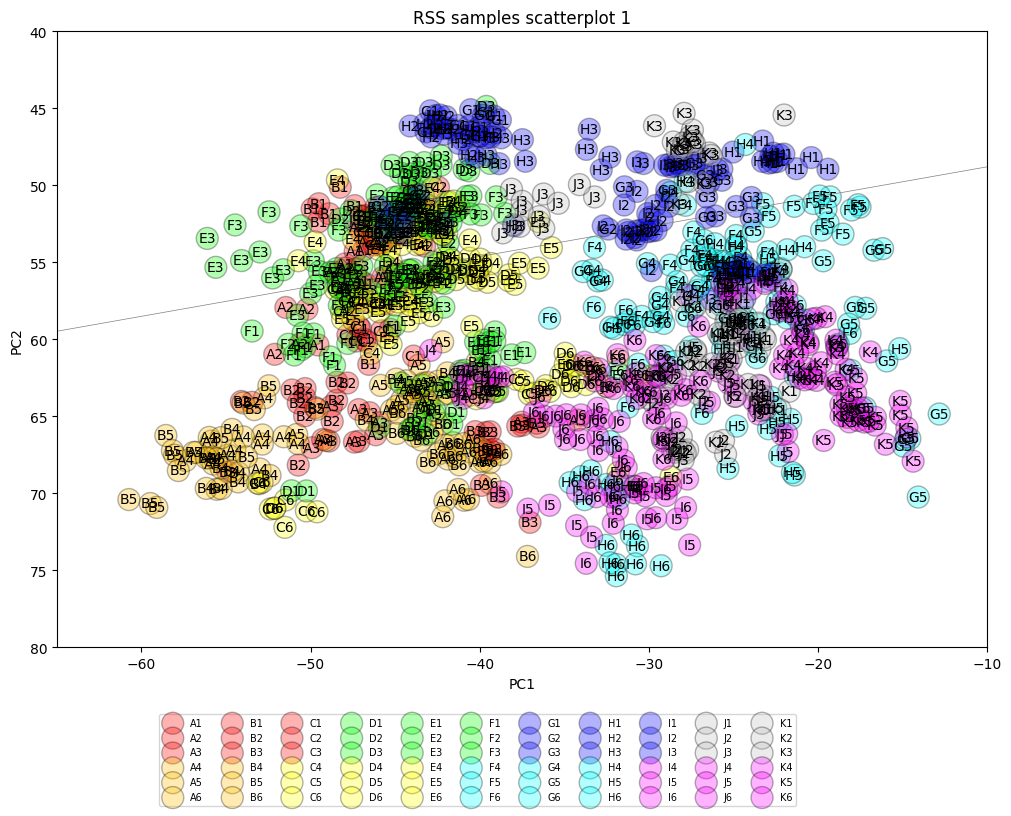

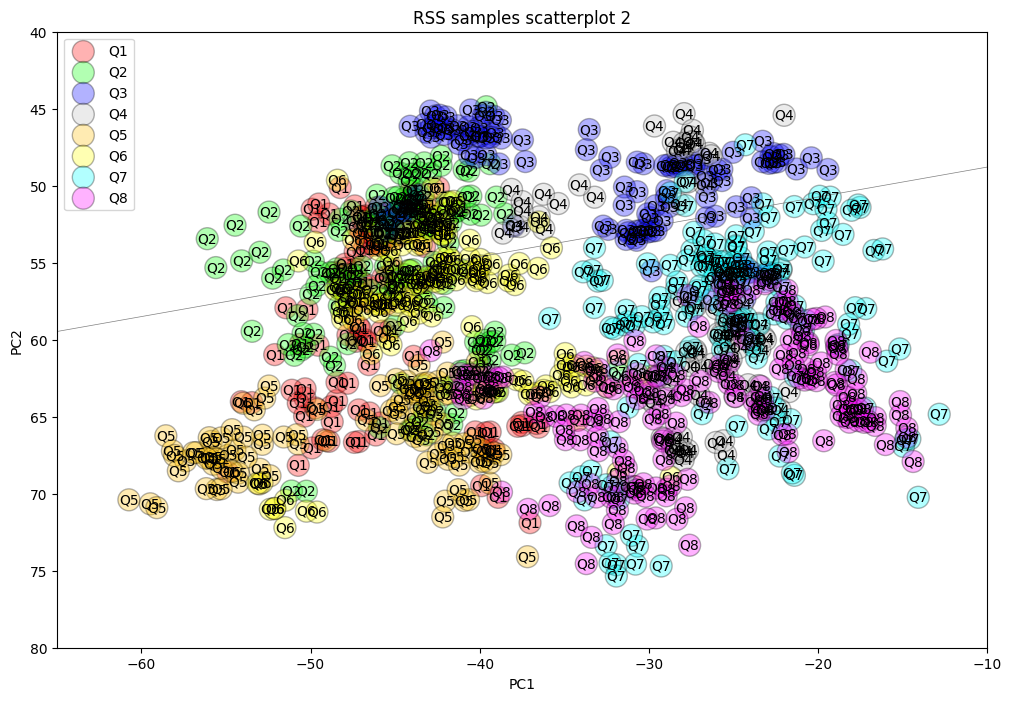

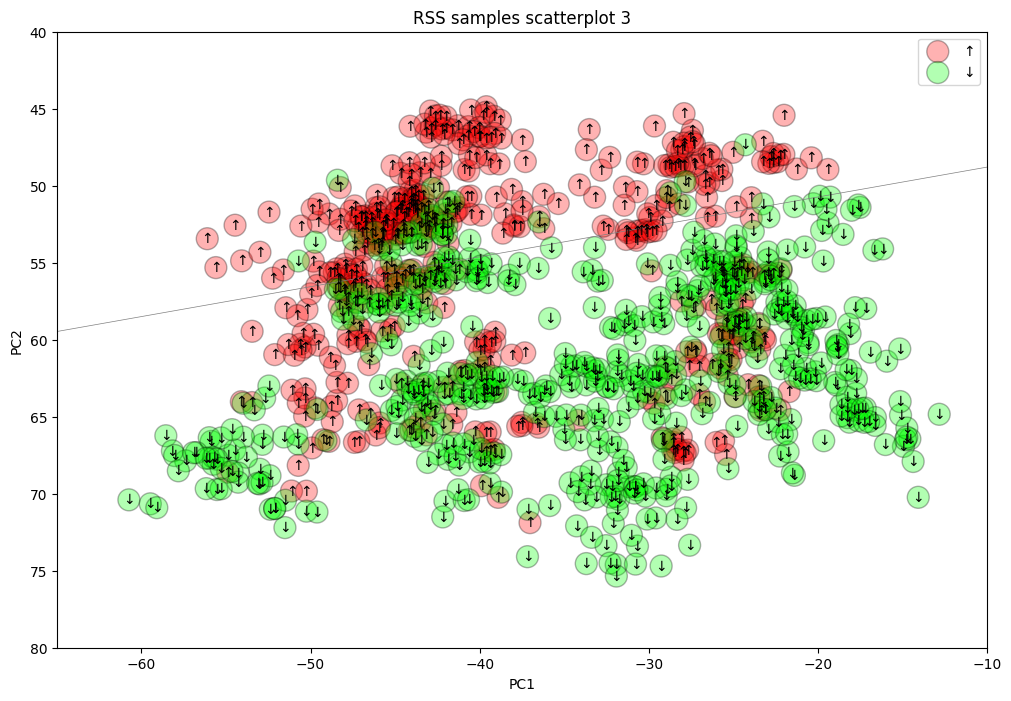

In [15]:
rss_database.to_csv("./Data/Fingerprints1.csv" , header=True , index=False )

plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'Tile'      , 'RSS samples scatterplot 1' )
plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'Region'    , 'RSS samples scatterplot 2' )
plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'TopBottom' , 'RSS samples scatterplot 3' )

In [16]:
database1

,Tile,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq
0,A1,Q1,↑,1.000000e-04,0.000013,0.000005,1.000000e-06
1,A1,Q1,↑,1.258925e-04,0.000013,0.000008,3.162278e-07
2,A1,Q1,↑,1.000000e-04,0.000013,0.000006,1.584893e-07
3,A1,Q1,↑,1.000000e-04,0.000016,0.000005,1.258925e-06
4,A1,Q1,↑,1.000000e-04,0.000013,0.000004,3.981072e-07
...,...,...,...,...,...,...,...
1049,K1,Q4,↑,2.511886e-06,0.000006,0.000631,2.511886e-07
1050,K1,Q4,↑,6.309573e-07,0.000005,0.000631,3.981072e-07
1051,K1,Q4,↑,3.981072e-07,0.000003,0.000631,3.981072e-07
1052,K1,Q4,↑,5.011872e-07,0.000004,0.000631,3.162278e-07


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Average RSS by Tile scatterplot #3'}, xlabel='PC1', ylabel='PC2'>)

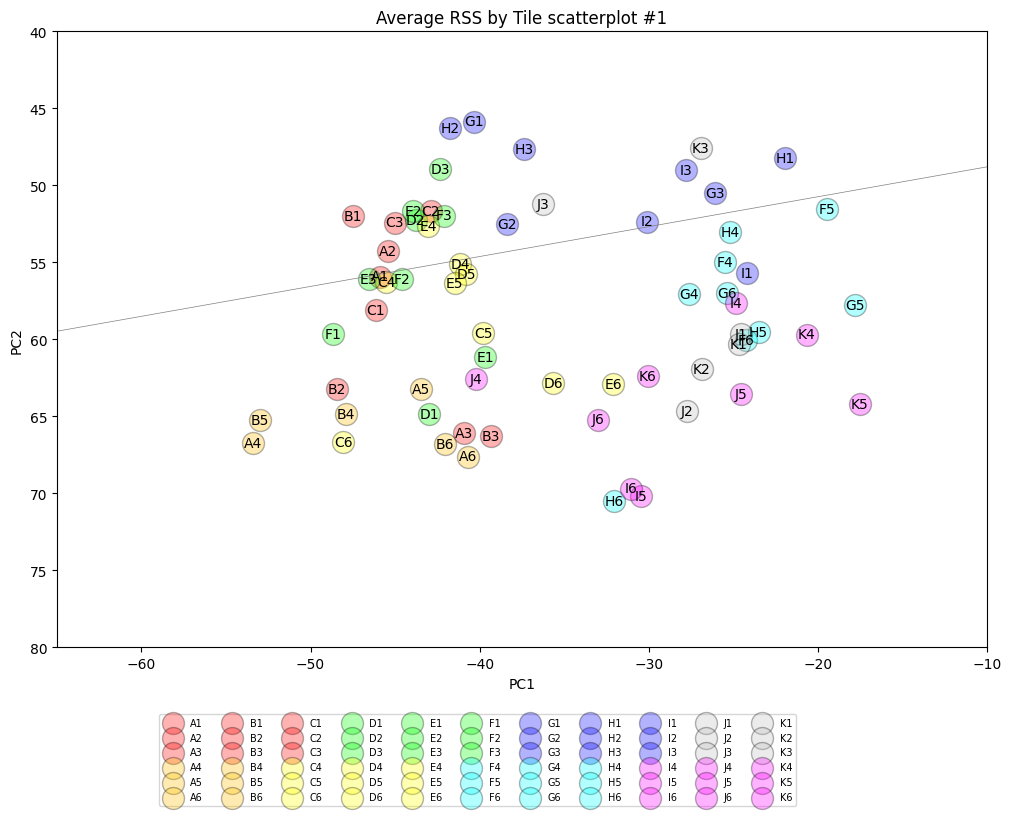

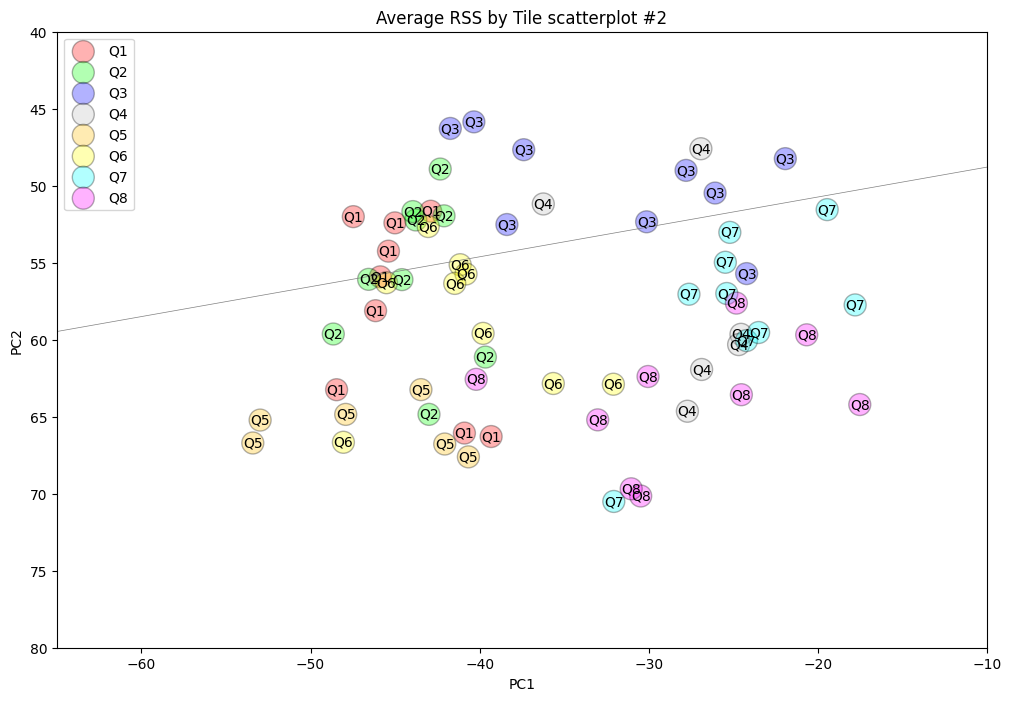

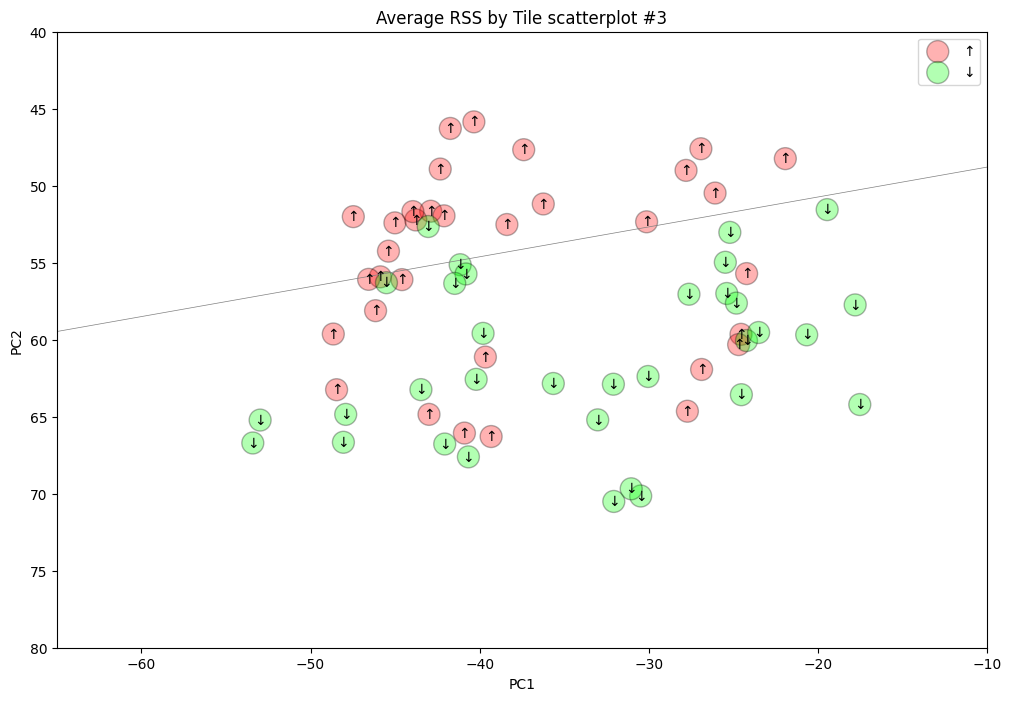

In [17]:
temp = database1

Tiles = sorted( temp['Tile'].unique() )
_rss = None
#-------------------------------------------------------------------------------------------------------------------------------------------
for tile in Tiles:
    sample = temp.loc[ (temp['Tile']==tile) ]
    sample = sample.drop( 'Region'    , axis=1 )
    sample = sample.drop( 'Tile'      , axis=1 )
    sample = sample.drop( 'TopBottom' , axis=1 )
    means  = sample.mean( axis=0 ) 

    mean1 = means['69xXAnonymousXx69-1']
    mean2 = means['69xXAnonymousXx69-2']
    mean3 = means['69xXAnonymousXx69-3']
    mean4 = means['JUb4oa3ahq']
    
    rss1 =  10 * math.log10( mean1 )
    rss2 =  10 * math.log10( mean2 )
    rss3 =  10 * math.log10( mean3 )
    rss4 =  10 * math.log10( mean4 )

    _newrow = pd.DataFrame( [ [ tile , tile , tile , mean1 , mean2 , mean3 , mean4 , rss1 , rss2 , rss3 , rss4 ] ] , columns=['Tile','Region','TopBottom','69xXAnonymousXx69-1','69xXAnonymousXx69-2','69xXAnonymousXx69-3','JUb4oa3ahq','RSS_1','RSS_2','RSS_3','RSS_4'] )
    if not _rss is None:
        _rss = pd.concat( [_rss,_newrow] , axis=0 )
    else:
        _rss = _newrow
#-------------------------------------------------------------------------------------------------------------------------------------------
_rss['Region']    = _rss['Region'].replace( mapping1 )
_rss['TopBottom'] = _rss['TopBottom'].replace( mapping2 )
_rss              = _rss.reset_index( drop=True )
_rss_data         = _rss.copy()
matrix_data       = _rss.loc[ : , ['RSS_1','RSS_2','RSS_3','RSS_4'] ]

PCs = pd.DataFrame( np.matmul( matrix_data.to_numpy() , covariance_eigVectors1.to_numpy() ) , columns=['PC1','PC2','PC3','PC4'] )
rss_database = pd.concat( [_rss,PCs] , axis=1 )
rss_database.to_csv("./Data/Fingerprints2.csv" , header=True , index=False )

plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'Tile'      , 'Average RSS by Tile scatterplot #1' )
plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'Region'    , 'Average RSS by Tile scatterplot #2' )
plot_RSS_Scatterplot( rss_database , 'PC1' , 'PC2' , 'TopBottom' , 'Average RSS by Tile scatterplot #3' )

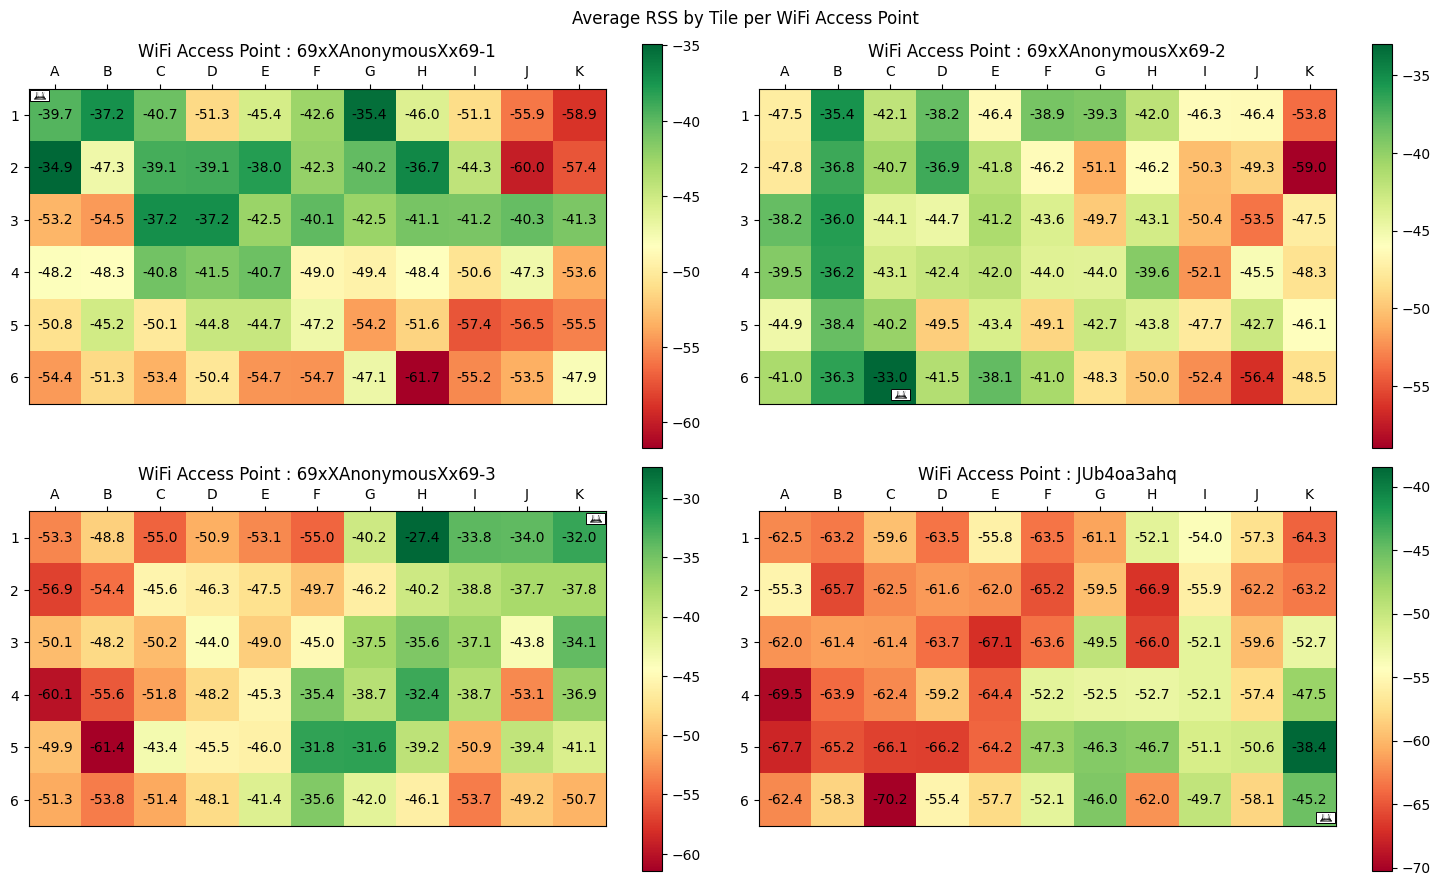

In [18]:
def Heatmap( _cols , _rows , _rss1 , _rss2 , _rss3 , _rss4 ): 
    try:
        router = OffsetImage( image.imread('Router.png') , zoom = 0.28 )
        icon1  = AnnotationBbox( router , (-0.3 , -0.35) , frameon = False)
        icon2  = AnnotationBbox( router , ( 2.2 ,  5.35) , frameon = False)
        icon3  = AnnotationBbox( router , (10.3 , -0.35) , frameon = False)
        icon4  = AnnotationBbox( router , (10.3 ,  5.35) , frameon = False)
        
        fig_size = [ 15 , 9 ] # [ width , height ]
        fig, ax = plt.subplots( nrows = 2 , ncols = 2 , figsize = fig_size )

        im1 = ax[0,0].imshow( _rss1 , cmap='RdYlGn' )
        ax[0,0].add_artist(icon1)
        ax[0,0].set_xticks( np.arange(len(_cols)) , labels=_cols )
        ax[0,0].set_yticks( np.arange(len(_rows)) , labels=_rows )
        ax[0,0].set_title('WiFi Access Point : 69xXAnonymousXx69-1')
        ax[0,0].tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)

        im2 = ax[0,1].imshow( _rss2 , cmap='RdYlGn' )
        ax[0,1].add_artist(icon2)
        ax[0,1].set_xticks( np.arange(len(_cols)) , labels=_cols )
        ax[0,1].set_yticks( np.arange(len(_rows)) , labels=_rows )
        ax[0,1].set_title('WiFi Access Point : 69xXAnonymousXx69-2')
        ax[0,1].tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)

        im3 = ax[1,0].imshow( _rss3 , cmap='RdYlGn' )
        ax[1,0].add_artist(icon3)
        ax[1,0].set_xticks( np.arange(len(_cols)) , labels=_cols )
        ax[1,0].set_yticks( np.arange(len(_rows)) , labels=_rows )
        ax[1,0].set_title('WiFi Access Point : 69xXAnonymousXx69-3')
        ax[1,0].tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)

        im4 = ax[1,1].imshow( _rss4 , cmap='RdYlGn' )
        ax[1,1].add_artist(icon4)
        ax[1,1].set_xticks( np.arange(len(_cols)) , labels=_cols )
        ax[1,1].set_yticks( np.arange(len(_rows)) , labels=_rows )
        ax[1,1].set_title('WiFi Access Point : JUb4oa3ahq')
        ax[1,1].tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)
        
        cbar1 = ax[0,0].figure.colorbar( im1 , ax=ax[0,0] )
        cbar2 = ax[0,1].figure.colorbar( im2 , ax=ax[0,1] )
        cbar3 = ax[1,0].figure.colorbar( im3 , ax=ax[1,0] )
        cbar4 = ax[1,1].figure.colorbar( im4 , ax=ax[1,1] )

        for _col in range(len(_cols)):
            for _row in range(len(_rows)):
                text1 = ax[0,0].text( _col , _row , round(_rss1[_row , _col],1) , ha="center" , va="center" , color="black" )
                text2 = ax[0,1].text( _col , _row , round(_rss2[_row , _col],1) , ha="center" , va="center" , color="black" )
                text3 = ax[1,0].text( _col , _row , round(_rss3[_row , _col],1) , ha="center" , va="center" , color="black" )
                text4 = ax[1,1].text( _col , _row , round(_rss4[_row , _col],1) , ha="center" , va="center" , color="black" )

        fig.suptitle("Average RSS by Tile per WiFi Access Point")
        fig.tight_layout()

    except Exception as err:
        print( "Heatmap" , err )

#------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------
        
try:
    _rss1 = np.array( [None] * 66 , dtype=float).reshape( (6,11) )
    _rss2 = np.array( [None] * 66 , dtype=float).reshape( (6,11) )
    _rss3 = np.array( [None] * 66 , dtype=float).reshape( (6,11) )
    _rss4 = np.array( [None] * 66 , dtype=float).reshape( (6,11) )
    _cols = ['A','B','C','D','E','F','G','H','I','J','K']
    _rows = ['1','2','3','4','5','6']
    _ncol = 0
    for _col in _cols:
        _nrow = 0
        for _row in _rows:
            _tile = _col + _row
            _rss1[_nrow,_ncol] = float(_rss_data.loc[ (_rss_data['Tile']==_tile) , 'RSS_1' ])
            _rss2[_nrow,_ncol] = float(_rss_data.loc[ (_rss_data['Tile']==_tile) , 'RSS_2' ])
            _rss3[_nrow,_ncol] = float(_rss_data.loc[ (_rss_data['Tile']==_tile) , 'RSS_3' ])
            _rss4[_nrow,_ncol] = float(_rss_data.loc[ (_rss_data['Tile']==_tile) , 'RSS_4' ])
            _nrow += 1
        _ncol += 1
    #------------------------------------------------------------------------------------------------------------------------------
    Heatmap( _cols , _rows , _rss1 , _rss2 , _rss3 , _rss4 )
    #------------------------------------------------------------------------------------------------------------------------------
except Exception as err:
        print( "Error : " , err )

In [19]:
database1

,Tile,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq
0,A1,Q1,↑,1.000000e-04,0.000013,0.000005,1.000000e-06
1,A1,Q1,↑,1.258925e-04,0.000013,0.000008,3.162278e-07
2,A1,Q1,↑,1.000000e-04,0.000013,0.000006,1.584893e-07
3,A1,Q1,↑,1.000000e-04,0.000016,0.000005,1.258925e-06
4,A1,Q1,↑,1.000000e-04,0.000013,0.000004,3.981072e-07
...,...,...,...,...,...,...,...
1049,K1,Q4,↑,2.511886e-06,0.000006,0.000631,2.511886e-07
1050,K1,Q4,↑,6.309573e-07,0.000005,0.000631,3.981072e-07
1051,K1,Q4,↑,3.981072e-07,0.000003,0.000631,3.981072e-07
1052,K1,Q4,↑,5.011872e-07,0.000004,0.000631,3.162278e-07


In [20]:
temp = database1

Regions = sorted( temp['Region'].unique() )
_rss = None
#-------------------------------------------------------------------------------------------------------------------------------------------
for region in Regions:
    sample = temp.loc[ (temp['Region']==region) ]
    sample = sample.drop( 'Region'    , axis=1 )
    sample = sample.drop( 'Tile'      , axis=1 )
    sample = sample.drop( 'TopBottom' , axis=1 )
    means  = sample.mean( axis=0 ) 

    mean1 = means['69xXAnonymousXx69-1']
    mean2 = means['69xXAnonymousXx69-2']
    mean3 = means['69xXAnonymousXx69-3']
    mean4 = means['JUb4oa3ahq']
    
    rss1 =  10 * math.log10( mean1 )
    rss2 =  10 * math.log10( mean2 )
    rss3 =  10 * math.log10( mean3 )
    rss4 =  10 * math.log10( mean4 )

    _newrow = pd.DataFrame( [ [ region , region , mean1 , mean2 , mean3 , mean4 , rss1 , rss2 , rss3 , rss4 ] ] , columns=['Region','TopBottom','69xXAnonymousXx69-1','69xXAnonymousXx69-2','69xXAnonymousXx69-3','JUb4oa3ahq','RSS_1','RSS_2','RSS_3','RSS_4'] )
    if not _rss is None:
        _rss = pd.concat( [_rss,_newrow] , axis=0 )
    else:
        _rss = _newrow
#-------------------------------------------------------------------------------------------------------------------------------------------
_rss['TopBottom'] = _rss['TopBottom'].replace( mapping3 )
_rss              = _rss.reset_index( drop=True )
matrix_data = _rss.loc[ : , ['RSS_1','RSS_2','RSS_3','RSS_4'] ]

PCs = pd.DataFrame( np.matmul( matrix_data.to_numpy() , covariance_eigVectors1.to_numpy() ) , columns=['PC1','PC2','PC3','PC4'] )
rss_database = pd.concat( [_rss,PCs] , axis=1 )

PC1_mean = rss_database['PC1'].mean()
PC2_mean = rss_database['PC2'].mean()
PC3_mean = rss_database['PC3'].mean()
PC4_mean = rss_database['PC4'].mean()

rss_database["PC1_centered"] = rss_database["PC1"] - PC1_mean
rss_database["PC2_centered"] = rss_database["PC2"] - PC2_mean

rss_database["PC1_norm"] = rss_database["PC1_centered"] / np.sqrt( rss_database["PC1_centered"] ** 2 + rss_database["PC2_centered"] ** 2 )
rss_database["PC2_norm"] = rss_database["PC2_centered"] / np.sqrt( rss_database["PC1_centered"] ** 2 + rss_database["PC2_centered"] ** 2 )
rss_database["radians"]  = 2 * np.arctan( rss_database["PC2_centered"] / rss_database["PC1_centered"] )
# rss_database["radians"]  = rss_database["radians"].abs()

rss_database.to_csv("./Data/fingerprint_vectors.csv" , header=True , index=False )
rss_database

,Region,TopBottom,69xXAnonymousXx69-1,69xXAnonymousXx69-2,69xXAnonymousXx69-3,JUb4oa3ahq,RSS_1,RSS_2,RSS_3,RSS_4,PC1,PC2,PC3,PC4,PC1_centered,PC2_centered,PC1_norm,PC2_norm,radians
0,Q1,↑,0.000123,0.000119,0.000009,9.896535e-07,-39.087433,-39.243806,-50.703678,-60.045168,-45.011625,54.579251,-29.835454,-57.871354,-10.295727,-0.790481,-0.997066,-0.076552,0.153255
1,Q2,↑,0.000093,0.000076,0.000017,6.880441e-07,-40.313437,-41.192472,-47.688599,-61.623837,-43.125109,53.814143,-32.960997,-59.594701,-8.409210,-1.555589,-0.983317,-0.181900,0.365837
2,Q3,↑,0.000093,0.000033,0.000350,3.436191e-06,-40.301283,-44.750801,-34.561181,-54.639227,-29.516913,47.021962,-34.521142,-59.436737,5.198986,-8.347770,0.528655,-0.848837,-2.027562
3,Q4,↑,0.000030,0.000010,0.000309,1.678619e-06,-45.298833,-50.049231,-35.099263,-57.750478,-28.571715,51.075902,-38.095933,-65.173576,6.144184,-4.293830,0.819677,-0.572827,-1.219900
4,Q5,↓,0.000013,0.000132,0.000005,4.753263e-07,-48.824047,-38.794277,-53.300402,-63.230082,-45.117753,64.003024,-34.620892,-58.285116,-10.401854,8.633292,-0.769490,0.638659,-1.385508
5,Q6,↓,0.000042,0.000096,0.000028,7.686063e-07,-43.764103,-40.167017,-45.560800,-61.142961,-40.443597,55.662191,-35.154792,-58.078487,-5.727699,0.292460,-0.998699,0.050994,-0.102033
6,Q7,↓,0.000010,0.000044,0.000300,1.212563e-05,-50.031133,-43.518969,-35.235098,-49.162957,-23.191373,55.952432,-33.929086,-56.884322,11.524526,0.582700,0.998724,0.050497,0.101037
7,Q8,↓,0.000007,0.000018,0.000072,3.317591e-05,-51.827305,-47.362532,-41.455469,-44.791772,-22.749106,60.848950,-27.740375,-60.535054,11.966793,5.479218,0.909225,0.416305,0.858756


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Average RSS by Region scatterplot #2'}, xlabel='PC1', ylabel='PC2'>)

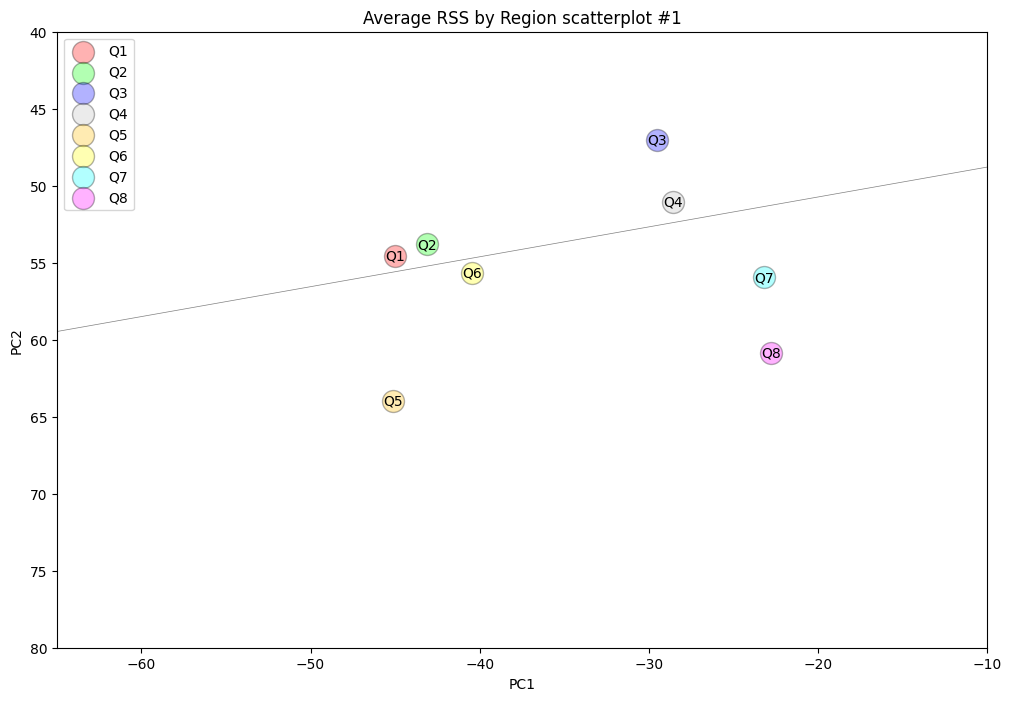

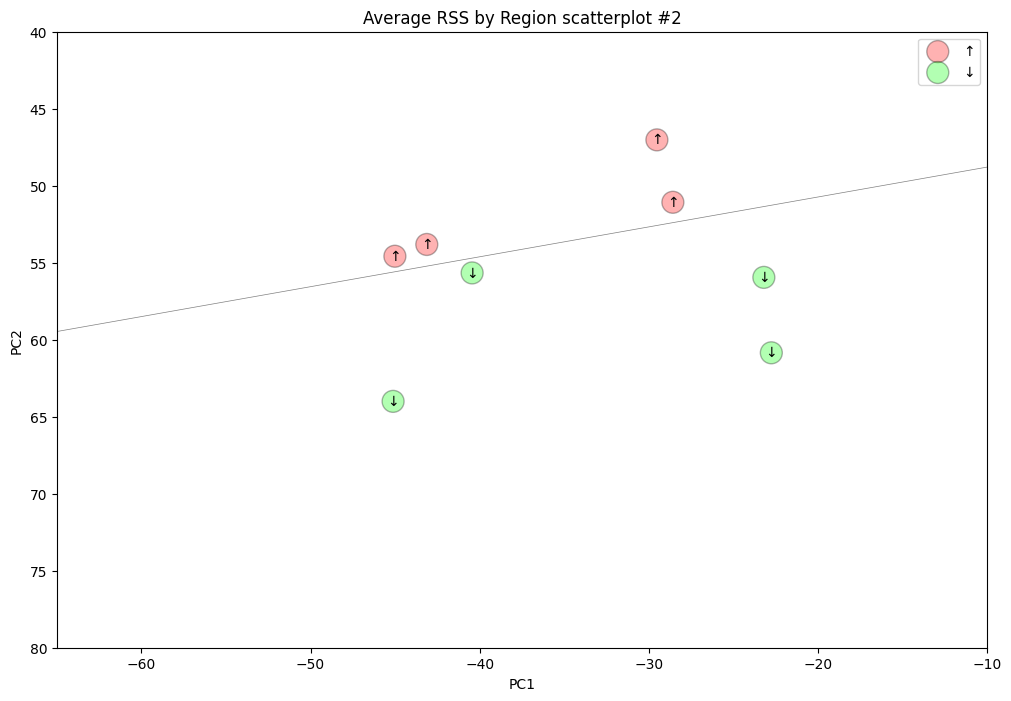

In [21]:
plot_RSS_Scatterplot(  rss_database , 'PC1' , 'PC2' , 'Region'    , 'Average RSS by Region scatterplot #1' )
plot_RSS_Scatterplot(  rss_database , 'PC1' , 'PC2' , 'TopBottom' , 'Average RSS by Region scatterplot #2' )

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Average RSS by Region scatterplot #2'}, xlabel='PC3', ylabel='PC2'>)

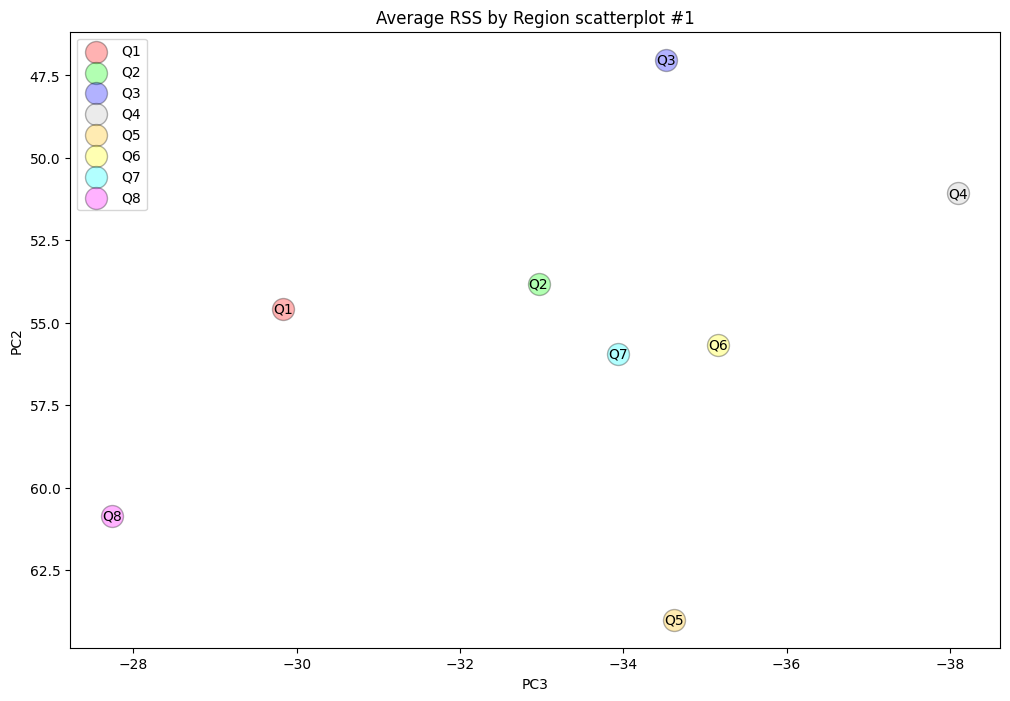

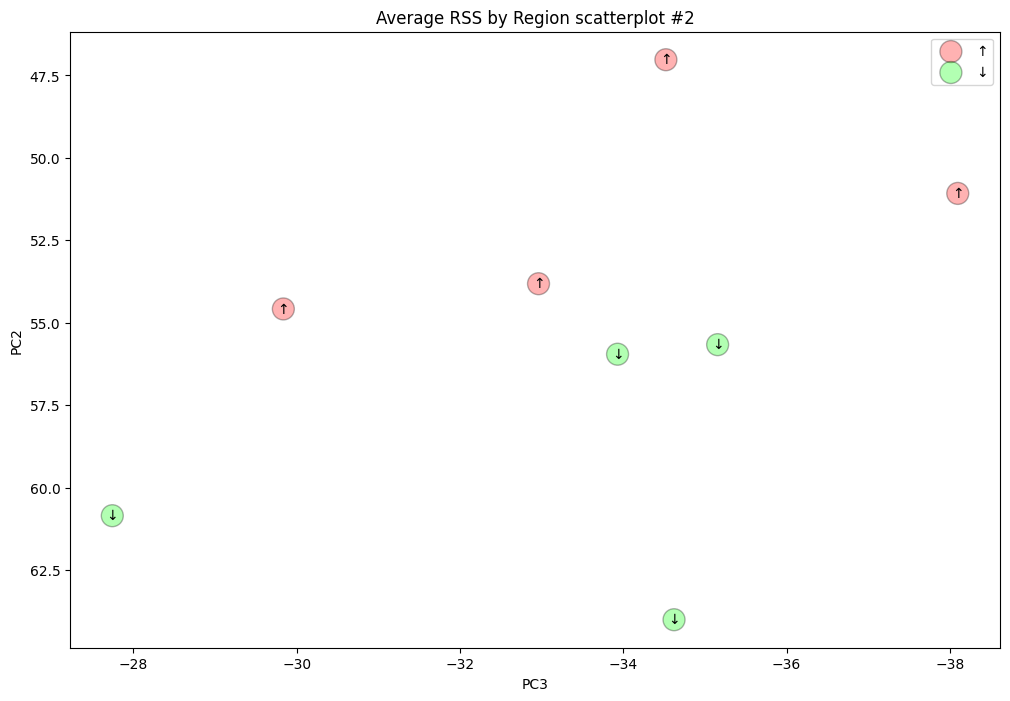

In [22]:
plot_RSS_Scatterplot2( rss_database , 'PC3' , 'PC2' , 'Region'    , 'Average RSS by Region scatterplot #1' )
plot_RSS_Scatterplot2( rss_database , 'PC3' , 'PC2' , 'TopBottom' , 'Average RSS by Region scatterplot #2' )

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Average RSS by Region scatterplot #2'}, xlabel='PC1', ylabel='PC3'>)

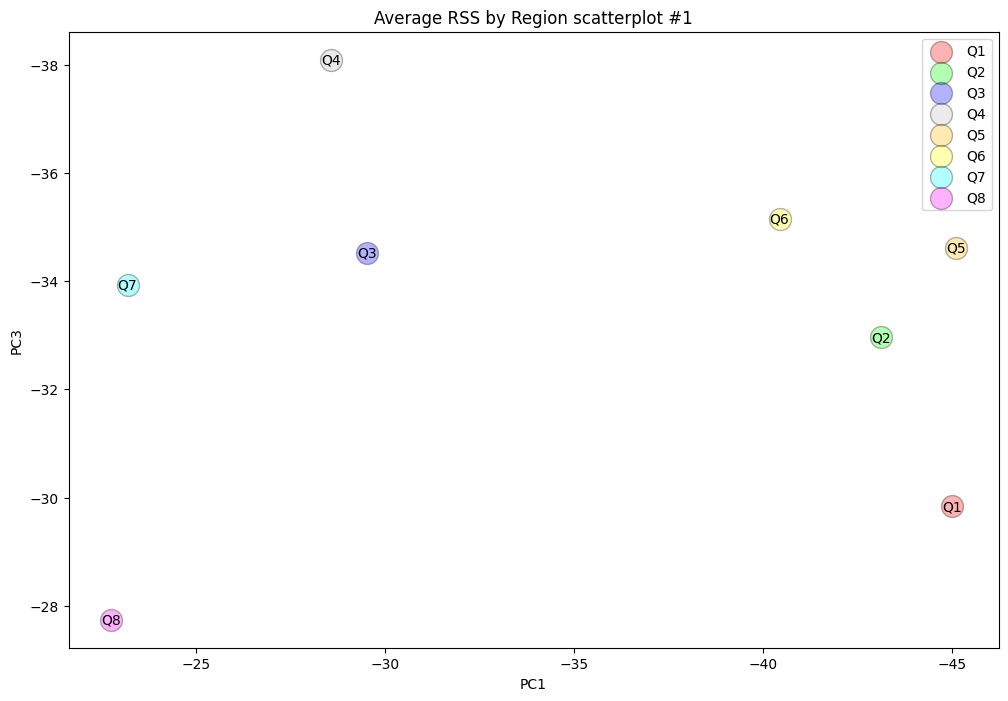

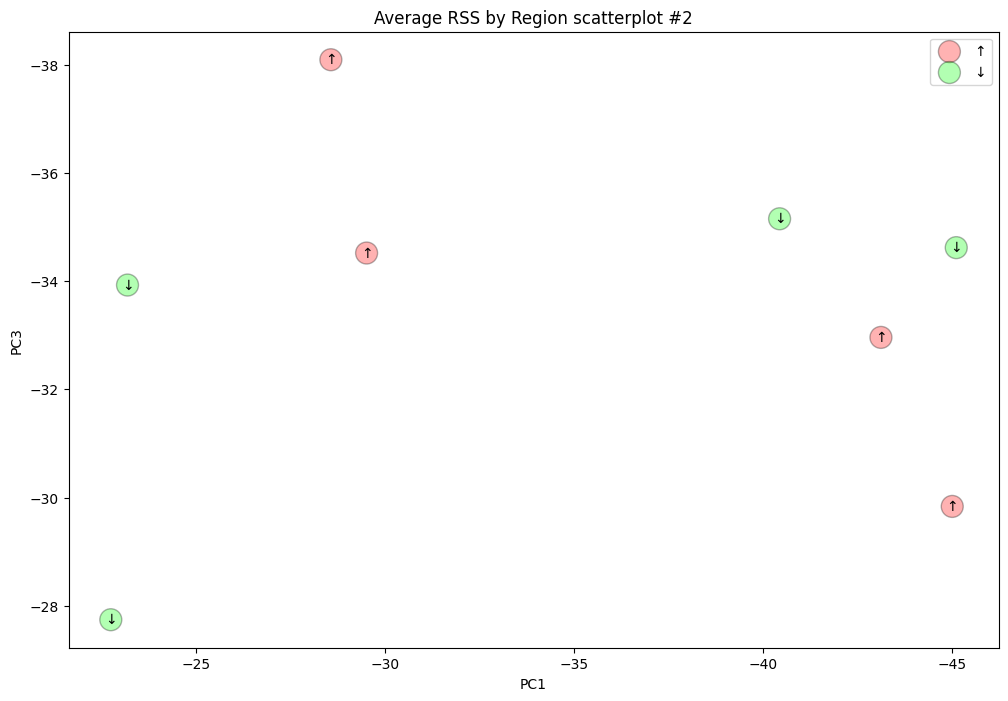

In [23]:
plot_RSS_Scatterplot2( rss_database , 'PC1' , 'PC3' , 'Region'    , 'Average RSS by Region scatterplot #1' )
plot_RSS_Scatterplot2( rss_database , 'PC1' , 'PC3' , 'TopBottom' , 'Average RSS by Region scatterplot #2' )

In [24]:
Regions = sorted( test_data['Region'].unique() )
print(Regions)

test_data_mean = None

for region in Regions:
    sample = test_data.loc[ (test_data["Region"] == region ) ]

    RSS_1 = 10 * np.log10( sample["69xXAnonymousXx69-1"].mean() )
    RSS_2 = 10 * np.log10( sample["69xXAnonymousXx69-2"].mean() )
    RSS_3 = 10 * np.log10( sample["69xXAnonymousXx69-3"].mean() )
    RSS_4 = 10 * np.log10( sample["JUb4oa3ahq"].mean() ) 

    temp = pd.DataFrame( [[ region , RSS_1 , RSS_2 , RSS_3 , RSS_4 ]] , columns=["Region","RSS_1","RSS_2","RSS_3","RSS_4" ] )
    if test_data_mean is None:
        test_data_mean = temp
    else:
        test_data_mean = pd.concat( [ test_data_mean , temp ] , axis = 0 )

test_data_mean = test_data_mean.reset_index( drop = True )
test_data_mean

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


,Region,RSS_1,RSS_2,RSS_3,RSS_4
0,Q1,-39.260376,-39.188476,-50.122245,-60.989790
1,Q2,-40.661451,-40.966383,-47.806261,-61.586795
2,Q3,-40.066296,-44.664035,-34.451272,-54.732074
3,Q4,-45.127987,-49.806630,-35.397860,-57.894404
4,Q5,-48.843877,-38.476210,-53.759430,-63.142365
5,Q6,-44.503226,-39.432661,-45.718604,-61.073481
6,Q7,-49.846628,-43.326915,-35.034641,-49.139141
7,Q8,-51.665403,-47.288212,-41.994007,-46.007328


In [25]:
test_data_label = test_data_mean.loc[ : , [ "Region" ] ]
test_data_rss   = test_data_mean.loc[ : , [ "RSS_1" , "RSS_2" , "RSS_3" , "RSS_4" ] ]

PCs = pd.DataFrame( np.matmul( test_data_rss.to_numpy() , covariance_eigVectors1.to_numpy() ) , columns=['PC1','PC2','PC3','PC4'] )
PCs = pd.concat( [ test_data_label , PCs ] , axis = 1 )
PCs

,Region,PC1,PC2,PC3,PC4
0,Q1,-45.182370,54.362574,-30.923372,-57.932002
1,Q2,-43.104227,54.183344,-33.021669,-59.377860
2,Q3,-29.615485,46.764322,-34.564885,-59.362986
3,Q4,-28.977492,51.095155,-37.995049,-65.022861
4,Q5,-45.428483,64.285620,-34.340450,-58.030363
5,Q6,-40.411721,56.409174,-35.358742,-57.361050
6,Q7,-23.167622,55.700898,-33.961667,-56.668031
7,Q8,-23.930580,60.933618,-28.301585,-60.820240


In [26]:
PCs["PC1_centered"]  = PCs["PC1"] - PC1_mean
PCs["PC2_centered"]  = PCs["PC2"] - PC2_mean

PCs["PC1_norm"]  = PCs["PC1_centered"] / np.sqrt( PCs["PC1_centered"] ** 2 + PCs["PC2_centered"] ** 2 )
PCs["PC2_norm"]  = PCs["PC2_centered"] / np.sqrt( PCs["PC1_centered"] ** 2 + PCs["PC2_centered"] ** 2 )
PCs["radians"]   = 2 * np.arctan( PCs["PC2_centered"]  / PCs["PC1_centered"] )
# PCs["radians"]   = PCs["radians"].abs()

PCs = PCs.loc[ : , [ "Region" , "PC1", "PC2", "PC1_centered", "PC2_centered", "PC1_norm" , "PC2_norm" , "radians" ] ]

PCs.to_csv("./Data/test_vectors.csv" , header=True , index=False )
PCs

,Region,PC1,PC2,PC1_centered,PC2_centered,PC1_norm,PC2_norm,radians
0,Q1,-45.182370,54.362574,-10.466471,-1.007157,-0.995402,-0.095785,0.191863
1,Q2,-43.104227,54.183344,-8.388328,-1.186388,-0.990146,-0.140040,0.281003
2,Q3,-29.615485,46.764322,5.100414,-8.605410,0.509870,-0.860252,-2.071526
3,Q4,-28.977492,51.095155,5.738407,-4.274577,0.801956,-0.597383,-1.280467
4,Q5,-45.428483,64.285620,-10.712584,8.915888,-0.768619,0.639707,-1.388235
5,Q6,-40.411721,56.409174,-5.695822,1.039442,-0.983753,0.179527,-0.361011
6,Q7,-23.167622,55.700898,11.548277,0.331166,0.999589,0.028665,0.057338
7,Q8,-23.930580,60.933618,10.785319,5.563886,0.888712,0.458465,0.952535
